In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

#### Read the dataset

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

#### Explore the data

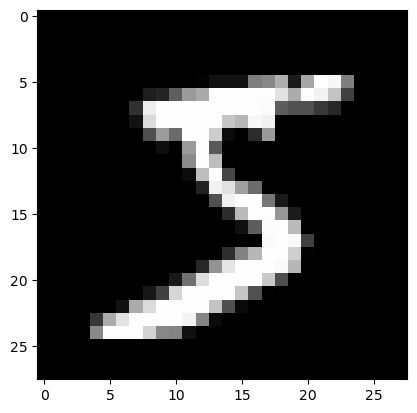

In [5]:
plt.imshow(x_train[0], cmap = 'gray')

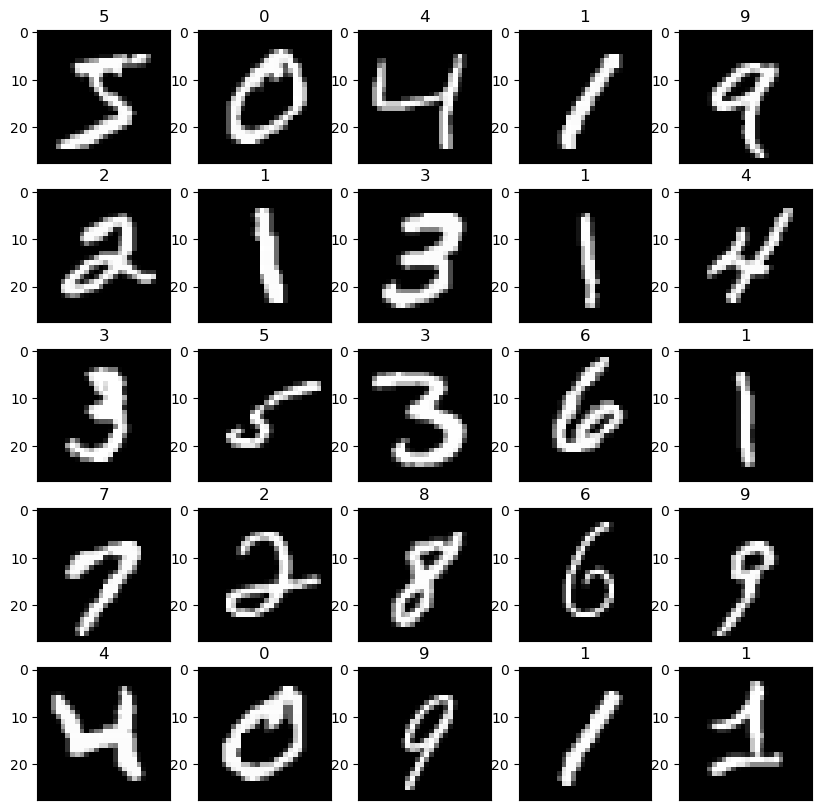

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap = 'gray')

#### Scale the data

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

#### Build the model

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(28,28,1), activation='relu',
         kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',  metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
3750/3750 [==============================] - 80s 20ms/step - loss: 0.1261 - accuracy: 0.9614
Epoch 2/10
3750/3750 [==============================] - 86s 23ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/10
3750/3750 [==============================] - 74s 20ms/step - loss: 0.0310 - accuracy: 0.9903
Epoch 4/10
3750/3750 [==============================] - 73s 19ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 5/10
3750/3750 [==============================] - 75s 20ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 6/10
3750/3750 [==============================] - 77s 20ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 7/10
3750/3750 [==============================] - 76s 20ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 8/10
3750/3750 [==============================] - 78s 21ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 9/10
3750/3750 [==============================] - 79s 21ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/10
3750/3750 [==============================] - 76s 20m

#### Evaluate on test data

In [13]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 52s 5ms/step - loss: 0.0415 - accuracy: 0.9906


[0.04154098033905029, 0.9905999898910522]

In [14]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

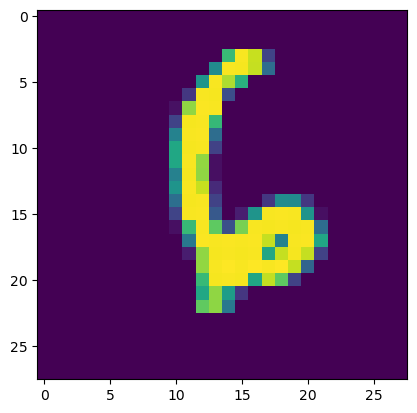

In [15]:
new = x_test[885]
plt.imshow(new);

In [16]:
new.shape

(28, 28)

In [17]:
new = new / 255
new = new.reshape(1,28,28)
np.argmax(model.predict(new))

1/1 [==============================] - 0s 423ms/step


6